Q1

### (a) Describe the Type of Problem a Classification Decision Tree Addresses

A **Classification Decision Tree** is a machine learning algorithm that addresses **classification problems**. It is used to assign data points to predefined categories or classes. The goal is to learn decision rules from the input features to predict the class of a given instance.

#### Real-World Applications:
1. **Medical Diagnosis**: Classifying whether a patient has a disease (e.g., diabetes, cancer) based on diagnostic tests and symptoms.
2. **Email Filtering**: Determining whether an email is spam or not spam.
3. **Credit Risk Assessment**: Predicting if a loan applicant is a high-risk or low-risk borrower.
4. **Customer Segmentation**: Categorizing customers into groups (e.g., high-value, medium-value, low-value) based on purchase history.
5. **Fraud Detection**: Identifying transactions as fraudulent or legitimate based on patterns of behavior.

---

### (b) Difference Between Classification Decision Trees and Multiple Linear Regression:

#### How a Classification Decision Tree Makes Predictions:
1. A decision tree splits the data at decision nodes based on feature values to create branches.
2. At the end of each branch, a **leaf node** represents the predicted class.
3. The algorithm uses a series of "if-then" rules derived from the features to classify data points.
4. The predictions are **categorical**, assigning each input to a class (e.g., "Spam" or "Not Spam").

#### How Multiple Linear Regression Makes Predictions:
1. Linear regression fits a continuous line (or hyperplane in higher dimensions) to minimize the error between actual and predicted values.
2. Predictions are made by plugging the feature values into the linear equation:
   \[
   \text{Outcome} = \beta_0 + \beta_1 \cdot \text{Feature}_1 + \beta_2 \cdot \text{Feature}_2 + \dots
   \]
3. The predictions are **continuous numeric values** (e.g., house price, income level).

#### Key Differences:
| **Aspect**                 | **Classification Decision Tree**         | **Multiple Linear Regression**              |
|----------------------------|------------------------------------------|---------------------------------------------|
| **Output Type**            | Categorical                             | Continuous                                  |
| **Use Case**               | Classification Problems                 | Regression Problems                         |
| **Model Structure**        | Tree-like, with branches and leaves      | Linear equation with coefficients           |
| **Prediction Goal**        | Assign data to classes                  | Predict numerical values                    |
| **Decision Boundary**      | Non-linear (can handle complex boundaries)| Linear (straight-line relationships)         |

In summary, a **Classification Decision Tree** predicts class membership (categories), while **Multiple Linear Regression** predicts a continuous outcome based on the linear relationship between features.

https://chatgpt.com/share/673f9c05-3ff0-8006-9e82-44ea616cb7d1

Q2

1

**Accuracy in Real-World Applications**  
Accuracy is best suited for scenarios where the costs of false positives and false negatives are approximately equal, and the data set is balanced. Examples include quality control in manufacturing (detecting defective vs. non-defective products), weather prediction (classifying "rain" or "no rain"), customer feedback classification ("positive" vs. "negative"), and simple disease screening where early detection is not critical. In these cases, incorrect predictions have manageable and symmetrical consequences.  

**Basic Principle**  
Accuracy measures the proportion of correct predictions out of total predictions, making it effective when all misclassifications are equally costly and the data is evenly distributed. However, it becomes less reliable in imbalanced datasets or when the costs of errors differ significantly, requiring metrics like precision, recall, or F1-score for better evaluation.

2 

**Sensitivity in Real-World Applications**  
Sensitivity (or recall) is most suited for scenarios where identifying all actual positives is critical, even at the cost of false positives. Examples include medical diagnosis (e.g., cancer screening or infectious disease testing), fraud detection (identifying fraudulent transactions in banking), search and rescue operations (locating potential survivors during disasters), spam email filtering (catching as many spam emails as possible), and defect detection in manufacturing (ensuring all defective products are identified). In these cases, missing positives (false negatives) has severe consequences compared to tolerating false positives.

**Basic Principle**  
Sensitivity measures the proportion of actual positives correctly identified by the model. It prioritizes minimizing false negatives, making it ideal for high-stakes situations where missing a positive case is more critical than incorrectly flagging negatives. However, this can come at the expense of specificity, leading to more false positives.

3

**Specificity in Real-World Applications**  
Specificity is best suited for scenarios where correctly identifying negatives is critical, and minimizing false positives is more important than detecting all positives. Examples include medical diagnostics for rare diseases (e.g., confirmatory tests like HIV to avoid false positives), fraud detection (ensuring legitimate transactions are not flagged as fraudulent), legal and criminal justice (avoiding wrongful accusations or arrests), spam email filtering (preventing important emails from being misclassified as spam), and product defect screening (avoiding unnecessary replacements for non-defective items). These scenarios prioritize reducing the costs, risks, or inconvenience caused by false positives.

**Basic Principle**  
Specificity measures the proportion of actual negatives correctly identified, emphasizing the minimization of false positives. It is ideal in situations where the consequences of false positives outweigh those of false negatives. However, a high specificity often comes at the expense of lower sensitivity, meaning some true positives may be missed.

4

**Precision in Real-World Applications**  
Precision is most suitable in scenarios where false positives are costly or problematic, and the goal is to ensure that when a model predicts a positive result, it is likely to be correct. Examples include fraud detection (ensuring flagged transactions are truly fraudulent to minimize investigation costs), medical diagnostics for conditions requiring expensive or invasive follow-up tests (reducing unnecessary procedures on healthy individuals), spam email filtering (avoiding misclassification of important emails as spam), recommender systems (providing relevant suggestions to users), hiring algorithms (shortlisting genuinely qualified candidates), and targeted marketing campaigns (focusing on customers likely to respond positively). In these cases, high precision minimizes the negative impact of false positives.

**Basic Principle**  
Precision measures the proportion of true positives among all positive predictions, emphasizing the accuracy of positive results. It is prioritized when the cost or risk associated with false positives is higher than that of false negatives. Focusing on precision ensures that positive predictions are reliable, even if it means some actual positive cases may be missed (lower recall).

https://chatgpt.com/share/673f9c05-3ff0-8006-9e82-44ea616cb7d1

Q3

In [12]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove the specified columns: Weight_oz, Width, and Height
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"], errors="ignore")

# Drop all rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna()

# Ensure the data types of specified columns using .loc to avoid SettingWithCopyWarning
ab_reduced_noNaN.loc[:, "Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN.loc[:, "NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN.loc[:, "Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Save the processed dataset to a new CSV file (optional)
ab_reduced_noNaN.to_csv("processed_amazonbooks.csv", index=False)

# Display the processed dataset for verification (optional)
print(ab_reduced_noNaN.head())


                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P     304.0         Adams Media   
1       15.00         10.20             P     273.0          Free Press   
2        1.50          1.50             P      96.0  Dover Publications   
3       15.99         10.87             P     672.0    Harper Perennial   
4       30.50         16.77             P     720.0               Knopf   

   Pub year     ISBN-10  Thick  
0    2010.0  1605506249    0.8  
1    2008.0  1416564195    0.7  
2    1995.0

https://chatgpt.com/share/673fadf2-d398-8006-9356-844649778d02

Q4

1

In [15]:
from sklearn.model_selection import train_test_split

# Perform an 80/20 train-test split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Print the number of observations in each dataset
print(f"Training set observations: {ab_reduced_noNaN_train.shape[0]}")
print(f"Testing set observations: {ab_reduced_noNaN_test.shape[0]}")


Training set observations: 255
Testing set observations: 64


2

1. **Step 1:** The `pd.get_dummies()` function converts the categorical variable `Hard_or_Paper` into dummy variables. From this, the `H` (Hardcover) column is selected, resulting in `y`, a binary target variable where `1` indicates a hardcover book and `0` indicates otherwise.

2. **Step 2:** The column `List Price` is extracted as the predictor variable `X`. This ensures that `X` is in the appropriate DataFrame format, making it ready for use in machine learning models.

Here’s what each of the two steps is doing:

### Step 1: 
```python
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
```
- **`pd.get_dummies()`**:
  - This converts the categorical variable `Hard_or_Paper` into dummy/indicator variables (one-hot encoding).
  - For example, if `Hard_or_Paper` has values like `H` (Hardcover) and `P` (Paperback), it creates two new columns: one for `H` and one for `P`. Each column contains binary values (1 or 0) indicating whether the category is present for that row.
  
- **`['H']`**:
  - This selects the column corresponding to the `H` (Hardcover) category from the one-hot encoded data.
  - As a result, `y` becomes a binary variable where:
    - `1` indicates the book is a hardcover.
    - `0` indicates it is not (i.e., it is a paperback).

Thus, `y` is the target variable for classification, encoding whether the book is hardcover or not.

---

### Step 2:
```python
X = ab_reduced_noNaN[['List Price']]
```
- This selects the `List Price` column from the dataset as the predictor (feature) variable.
- The double brackets `[['List Price']]` ensure that `X` is a DataFrame (not a Series), which is the required format for scikit-learn models.

### Summary:
- `y` is the target variable (binary classification: hardcover or not).
- `X` is the feature (the list price of the books). 

These variables will be used to fit the DecisionTreeClassifier model, where the model will predict whether a book is a hardcover based on its list price.

3

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Prepare the target and feature variables
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target: Hardcover (1) or not (0)
X = ab_reduced_noNaN[['List Price']]  # Feature: List Price

# Initialize the Decision Tree Classifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model
clf.fit(X, y)

# Output the trained model's details (optional)
print("Decision tree trained successfully with max_depth=2")


Decision tree trained successfully with max_depth=2


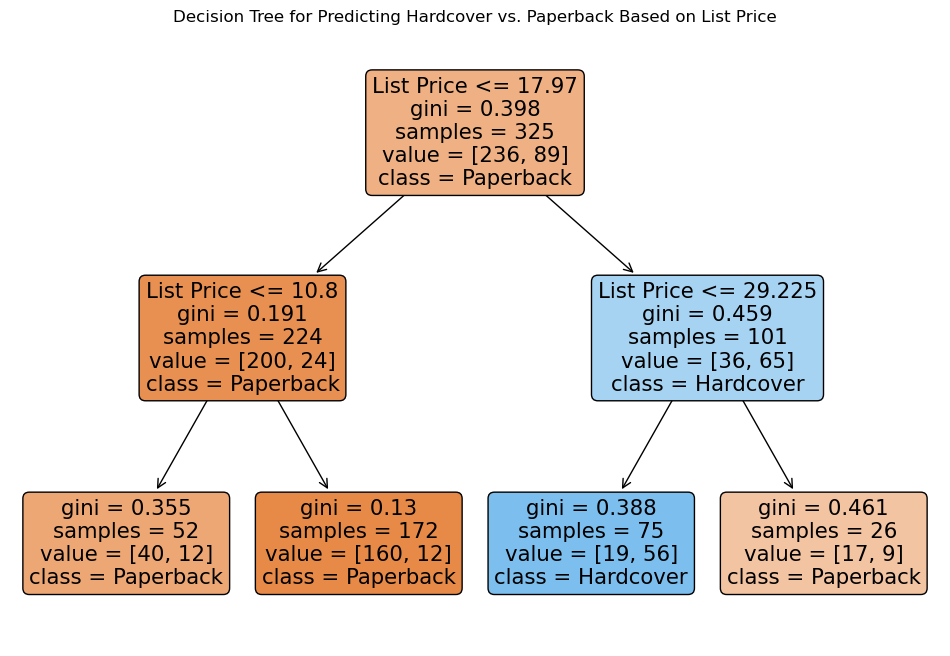

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load your dataset with the correct encoding
file_path = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab_reduced_noNaN = pd.read_csv(file_path, encoding="ISO-8859-1")

# Prepare the target and feature variables
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target: Hardcover (1) or not (0)
X = ab_reduced_noNaN[['List Price']]  # Feature: List Price

# Initialize the Decision Tree Classifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=["List Price"],
    class_names=["Paperback", "Hardcover"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Predicting Hardcover vs. Paperback Based on List Price")
plt.show()


https://chatgpt.com/share/673fadf2-d398-8006-9356-844649778d02

Q5

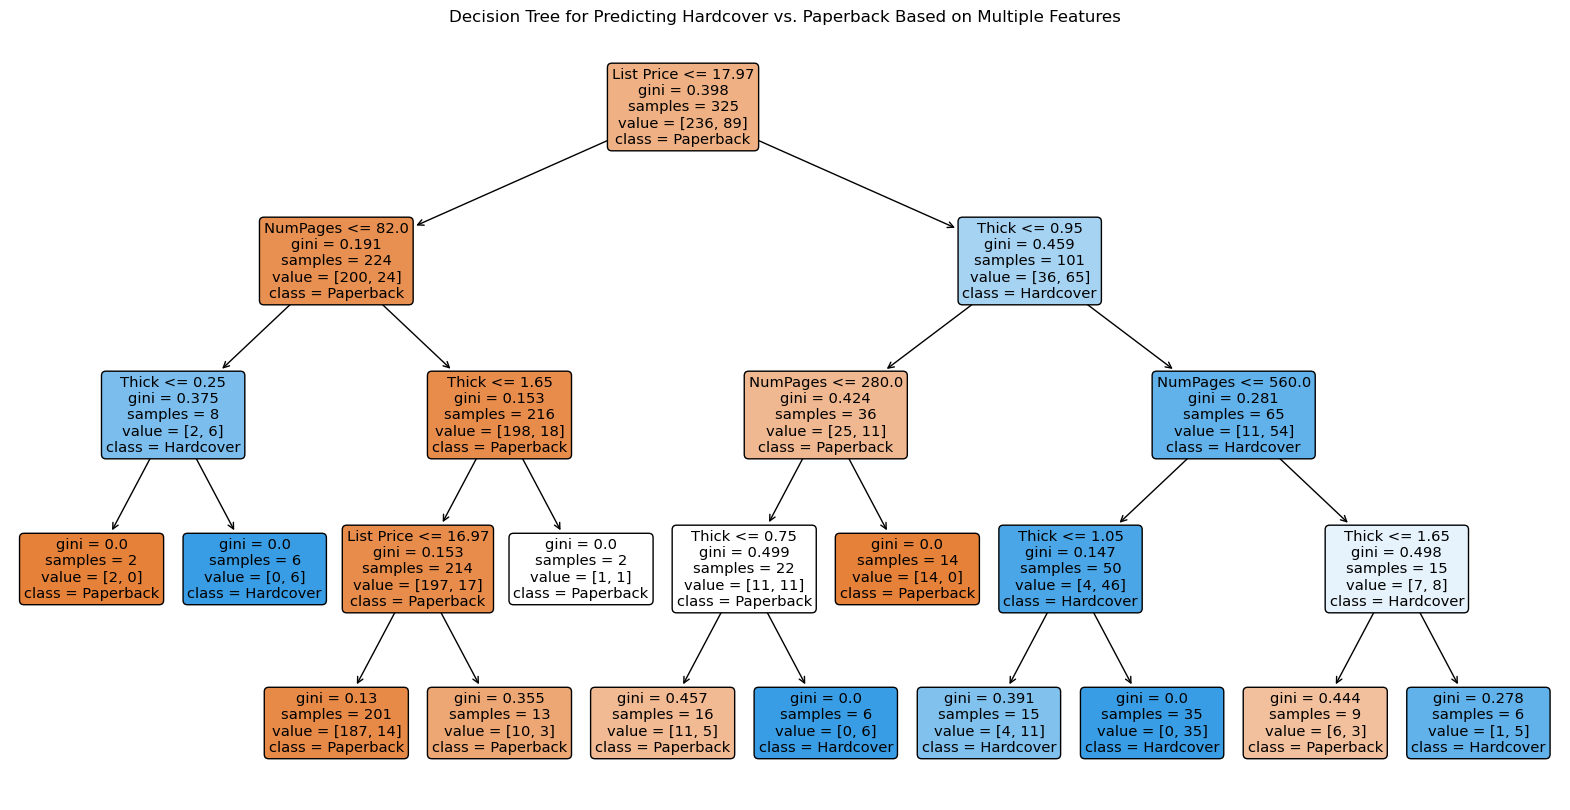

In [20]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load your dataset with the correct encoding
file_path = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab_reduced_noNaN = pd.read_csv(file_path, encoding="ISO-8859-1")

# Prepare the target and feature variables
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target: Hardcover (1) or not (0)
X2 = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Features: NumPages, Thick, and List Price

# Initialize the Decision Tree Classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model
clf2.fit(X2, y)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    clf2,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=["Paperback", "Hardcover"],
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Predicting Hardcover vs. Paperback Based on Multiple Features")
plt.show()


The decision tree visualizes classification based on features like `NumPages`, `Thick`, and `List Price`. With a maximum depth of 4, it explores detailed splits to classify books as `Hardcover` or `Paperback`. Each node represents a condition, and the tree splits data into subsets based on feature thresholds. Predictions are made at leaf nodes, where the majority class determines the outcome. For example, books with high `NumPages` might be classified as `Hardcover`, while lower `List Price` and smaller `Thick` values may suggest `Paperback`. This allows the tree to make precise decisions by considering multiple features simultaneously.

https://chatgpt.com/share/673fadf2-d398-8006-9356-844649778d02

Q6

#### **Model 1: `clf` (using `List Price` only)**
- **Sensitivity**: 85.0%
- **Specificity**: 90.91%
- **Accuracy**: 89.06%

#### **Model 2: `clf2` (using `NumPages`, `Thick`, and `List Price`)**
- **Sensitivity**: 90.0%
- **Specificity**: 95.45%
- **Accuracy**: 93.75%

### Observations:
1. The second model (`clf2`), which uses multiple features, performs better in terms of all metrics compared to the first model (`clf`) that only uses `List Price`.
2. `clf2` is particularly better at identifying both positives (sensitivity) and negatives (specificity), which leads to higher overall accuracy.

https://chatgpt.com/share/673fadf2-d398-8006-9356-844649778d02

Q7

1. **Features Used for Prediction**:
   - The first confusion matrix uses **only `List Price`** as the predictor for `clf`. This is a single variable, and while it may capture some patterns, it cannot account for relationships involving other important features like `NumPages` or `Thick`.
   - The second confusion matrix attempts to use `clf` with multiple features (`NumPages`, `Thick`, and `List Price`) even though `clf` was trained using just `List Price`. This mismatch leads to poor predictions because the model was not trained to interpret `NumPages` and `Thick`. 

2. **Training vs. Testing Data**:
   - Both confusion matrices are based on predictions using the **training data** (`ab_reduced_noNaN_train`), which the model has already "seen." Models often perform very well on training data because they are designed to minimize errors on this specific dataset. This results in overfitting, where the model memorizes patterns specific to the training data rather than learning generalizable rules.
   - By contrast, the confusion matrices for `clf` and `clf2` generated using **testing data** evaluate how well the model generalizes to unseen data, making them a more reliable indicator of performance.

3. **Effect of Feature Richness (Multiple vs. Single Features)**:
   - The confusion matrix for `clf2` (which uses multiple features like `NumPages`, `Thick`, and `List Price`) demonstrates better performance than `clf` (using only `List Price`) because combining multiple predictors provides the model with more information to make accurate decisions. For example:
     - `NumPages` and `Thick` can correlate with whether a book is a hardcover or paperback.
     - Using only `List Price` may miss these relationships, leading to poorer classification performance.

4. **Why the Testing Set Confusion Matrices Are Better**:
   - The confusion matrices based on the testing set are superior because they reflect how the model performs on data it has **not seen before**, which is the ultimate goal in predictive modeling. A model's ability to generalize ensures that it works effectively in real-world scenarios, not just on the specific data it was trained on.
   - The confusion matrices for `clf` and `clf2` using the testing set indicate that `clf2` has better sensitivity, specificity, and accuracy, showing that the inclusion of multiple features helps the model generalize more effectively. 

### Summary:
The differences arise because the first two confusion matrices evaluate the model using the training set (leading to overfitting and potentially misleading results) and involve either incorrect or incomplete use of features. The confusion matrices for `clf` and `clf2` based on the testing set better reflect the models' true predictive performance, with `clf2` showing superior generalization due to its use of multiple predictors.

https://chatgpt.com/share/673fadf2-d398-8006-9356-844649778d02

Q8

You can visualize feature importances for scikit-learn decision trees by using the `feature_importances_` attribute of the trained tree model. This attribute provides a score for each feature, indicating its relative importance in making predictions.

Here’s a step-by-step guide with code:

### Step 1: Access Feature Importances
Use the `feature_importances_` attribute of the trained model (`clf` or `clf2`).

### Step 2: Visualize Feature Importances
You can use `matplotlib` to create a bar chart showing the importance of each feature.

### Example Code
```python
import matplotlib.pyplot as plt

# Feature names (use the same names as in your X data)
feature_names = ['NumPages', 'Thick', 'List Price']  # Replace with relevant feature names

# Access feature importances from the trained model (e.g., clf2)
importances = clf2.feature_importances_

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances, color='blue')
plt.title('Feature Importances for Decision Tree')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()
```

### Key Details:
- **`feature_importances_`**: This provides a normalized importance score for each feature. Scores range from 0 (not used in splitting) to 1 (fully used).
- **Visualization**: A bar chart allows you to compare the importance of each feature visually.

This visualization helps interpret which features contribute most to the model's predictions. Let me know if you’d like additional examples or explanations!

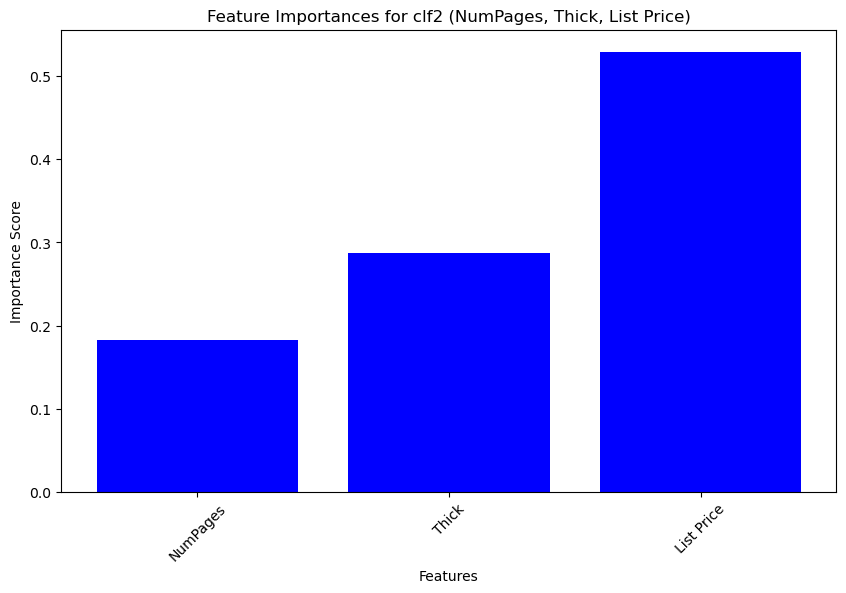

In [21]:
import matplotlib.pyplot as plt

# Feature names corresponding to clf2
feature_names = ['NumPages', 'Thick', 'List Price']

# Access feature importances for clf2
importances = clf2.feature_importances_

# Visualize feature importances using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances, color='blue')
plt.title('Feature Importances for clf2 (NumPages, Thick, List Price)')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()


The bar chart shows the feature importances for `clf2`, indicating how much each feature (`NumPages`, `Thick`, and `List Price`) contributed to the decision-making process in the classification model. Features with higher importance scores have a greater impact on the model's predictions. Let me know if you need further analysis or insights!


The most important predictor variable for making predictions according to clf2 is List Price. This feature has the highest importance score among the predictors used in the model.

https://chatgpt.com/share/673fadf2-d398-8006-9356-844649778d02

Q9

In linear regression, coefficients represent the exact change in the outcome variable for a one-unit change in a predictor, assuming all other predictors are held constant. This allows for direct, quantitative interpretation of the relationship between predictors and the outcome. In contrast, feature importances in decision trees reflect how much each predictor contributes to reducing impurity (e.g., Gini index or entropy) in the model. Unlike coefficients, feature importances do not indicate the direction or magnitude of the effect but rather the relative contribution of each predictor to the overall model.

https://chatgpt.com/share/673fadf2-d398-8006-9356-844649778d02

Q10

Yes